In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
%cd /content/drive/MyDrive/Colab Notebooks/challenge/data

!unzip -qq "/content/skyggle_MNISTy.zip"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/challenge/data'
/content
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


# Keras를 활용한 심층 신경망 실습 - mnist 손글씨 숫자 분류

In [ ]:
tf.__version__

'2.11.0'

순차 심층 신경망 모델 구현
6만개의 이미지로 이루어진 X_train을 심층 신경망 모델에 넣어서 y_train 데이터의 숫자로 인식하도록 학습
노드의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법 설정
학습을 마친 모델에 1만개의 이미지로 이루어진 X_test를 입력하여 정확도 측정

#### 데이터 준비: 분할, 차원변경, 정규화

In [8]:
# 데이터 파일 가져오기
import numpy as np
X_train_np = np.loadtxt('/content/X_train.txt')
y_train_np = np.loadtxt('/content/y_train.txt').astype(int)
X_test_np = np.loadtxt('/content/X_test.txt')

In [9]:
X_train_np.shape, y_train_np.shape, X_test_np.shape # ((60000,784), (60000,), (10000,784))

((60000, 784), (60000,), (10000, 784))

In [72]:
# 불러온 이미 데이터를 시각화해보기
import matplotlib.pyplot as plt
#X_train_np[0].reshape(28,28)
plt.show(X_train_np[0].reshape(28,28), cmap='gray') # 흰바탕 Greys

TypeError: ignored

In [18]:
y_train_np[:10].astype(int)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [19]:
# 타겟 분포 확인
pd.Series(y_train_np).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [20]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np,
                                                  stratify=y_train_np,
                                                  test_size=0.2,
                                                  random_state=42)

In [21]:
X_train_shape # (48000,784)

NameError: ignored

In [22]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

In [24]:
# y_train, y_val 원핫인코딩(= 카테고리화)
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

print(y_train[:10])
print(y_train_encoded[:10])

[1 3 6 8 6 8 5 7 8 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


인공 신경망 모델 구성

In [26]:
# 1) 모덺 및 레이어 구성
from keras.models import Sequential
from keras.layers import Flatten  # input_shape이 2차원 이상인 경우 Flatten()을 사용해야 함. 이번 실습에서는 
                                  # 본 실습에서는 input_shape(784, ) 1차원이므로 사용하지 않음.
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=20, activation='relu', input_shape=(784,)))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # 파라미터: name='' => 층에 이름을 만들어줌



In [27]:
# 2) 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 15)                315       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [28]:
!pip install pydot
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


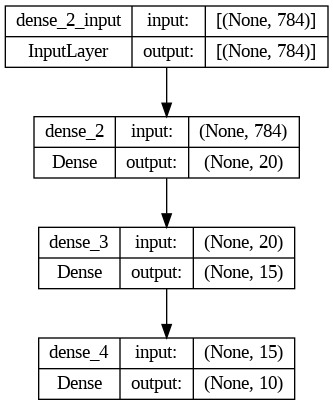

In [29]:
# 3) 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='MNIST.png')

최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [32]:
model.compile(loss='categorical_crossentropy',
              metrics='accuracy', 
              optimizer='adam')

모델 훈련

In [33]:
# 1) 모델 학습
hist = model.fit(X_train, y_train_encoded, 
                 epochs=10,
                 validation_data=(X_val, y_val_encoded))

Epoch 1/10
1500/1500 [==============================] - 5s 2ms/step - loss: 0.4595 - accuracy: 0.8655 - val_loss: 0.2611 - val_accuracy: 0.9243
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2271 - accuracy: 0.9337 - val_loss: 0.2121 - val_accuracy: 0.9395
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1902 - accuracy: 0.9446 - val_loss: 0.1936 - val_accuracy: 0.9443
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1688 - accuracy: 0.9499 - val_loss: 0.1878 - val_accuracy: 0.9450
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9544 - val_loss: 0.1725 - val_accuracy: 0.9508
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1411 - accuracy: 0.9582 - val_loss: 0.1712 - val_accuracy: 0.9507
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9598 - val_loss: 0.1725 - val_accuracy:

In [34]:
hist?

In [35]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
# loss, accuracy, val_loss는 점점 감소
# val_accuracy는 증가함
df = pd.DataFrame(hist.history)

손실과 정확도 그래프: 모델 성능 평가

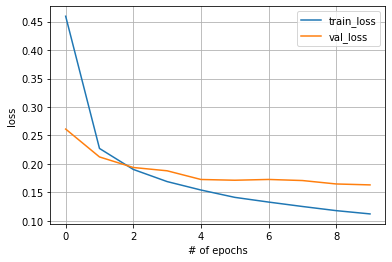

In [39]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')   # 딥러닝에서의 에폭설정(=과적합 확인 방법)
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.grid();

모델 학습 결과 시각화

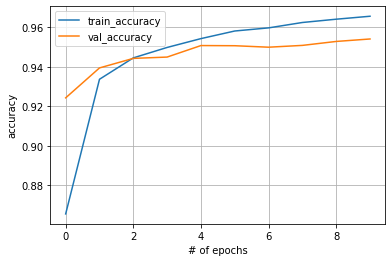

In [40]:
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')   # 딥러닝에서의 에폭설정(=과적합 확인 방법)
plt.xlabel('# of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid();

In [41]:
# 모델 성능 검증

model.evaluate(X_val, y_val_encoded)

375/375 [==============================] - 1s 4ms/step - loss: 0.1630 - accuracy: 0.9542


[0.16298209130764008, 0.9541666507720947]

In [45]:
# 모델 예측
# len(model.predict(X_val[0])) => 15000
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)

375/375 [==============================] - 1s 3ms/step


In [47]:
# 클래스 이름을 찾는 법
np.argmax(y_pred_proba, axis=-1)

12000

In [50]:
sub_df = pd.read_csv('/content/submission.csv')
sub_df

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


In [64]:
X_test_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 클래스 이름을 찾는 법
np.argmax(y_pred_proba, axis=-1)

In [62]:
y_test_proba = model.predict(X_test_np)

313/313 [==============================] - 1s 2ms/step


In [68]:
np.argmax(y_test_proba, axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [69]:
sub_df['label'] = np.argmax(y_test_proba, axis=-1)

In [70]:
sub_df

,no,label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


In [71]:
sub_df.to_csv('kimminsu.csv', index=False)

# Keras를 활용한 심층 신경망 실습 - Fashion_MNIST 의류 분류

데이터 준비

In [78]:
%cd /content/drive/MyDrive/Colab Notebooks/challenge/data

!unzip -qq "/content/skyggle_Fashion_MNIST.zip"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/challenge/data'
/content
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: X_train_F
replace X_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: X_test_F
replace X_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: X_trainF
replace y_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: y_train_F


In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install tensorflow_gpu==2.0.0-rcl  # 코랩에 텐서플로 최신버전 설치

In [82]:
# 데이터 수집
X_train_np = np.loadtxt('/content/X_trainF')
y_train_np = np.loadtxt('/content/y_train_F').astype(int)
X_test_np = np.loadtxt('/content/X_test_F')

In [154]:
# 데이터셋 크기 확인
X_train_np.shape, y_train_np.shape, X_test_np.shape

((60000, 784), (60000,), (10000, 784))

데이터 탐색

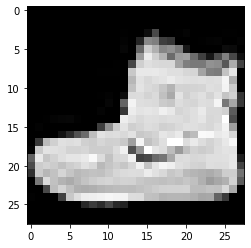

In [155]:
# 샘플 이미지 확인
# cmap의 기본값 'viridis' 짙은 녹색 ~ 밝은 노란색, cmap=gray, 0에 가까울수록 어둡다
import matplotlib.pyplot as plt
plt.imshow(X_train_np[0].reshape(28,28), cmap='gray')

In [85]:
# 클래스(타겟)의 내용과 의미 확인하기 => 9라는 의미는 클래스 이름이 boots일 가능성이 있다.
y_train_np[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

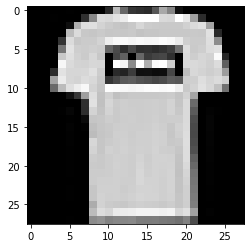

In [86]:
import matplotlib.pyplot as plt
plt.imshow(X_train_np[1].reshape(28,28), cmap='gray')

In [87]:
# 클래스(타겟)의 내용과 의미 확인하기 => 0이라는 의미는 클래스 이름이 Tshirt일 가능성이 있다.
y_train_np[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [88]:
class_names = [
                    "T-shirt/top",
                    "Trouser",
                    "Pullover",
                    "Dress",
                    "Coat",
                    "Sandal",
                    "Shirt",
                    "Sneaker",
                    "Bag",
                    "Ankle boot",
                ]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [156]:
# 타겟 분포 확인하기: numpy.bincount() - 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치를 
pd.Series(y_train_np).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

데이터 준비: 분할, 정규화, 차원변경

In [157]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np,
                                                   stratify = y_train_np,
                                                   test_size=0.2,
                                                   random_state=42)

In [158]:
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [159]:
y_train.shape, y_val.shape

((48000,), (12000,))

In [160]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

y_train_encoded = to_categorical(y_train)

In [ ]:
# 다중 분류 클래스인 y_train_np를 원핫 인코딩하지 않고 그래도 사용하되
# 최적화(compile)의 손실함수를 'sparse_categorical_crossentropy'를 사용함

인공 신경망 모형 구성

In [128]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(784,), activation='relu', \
                kernel_initializer='glorot_uniform')) # 은닉층
model.add(Dense(units=10,activation='softmax')) # 출력층 

In [129]:
model.summary()   # 노드수(784) + bias(1) => 785 => 785 + 은닉층의 가중치(100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


모델 구조 이미지 출력 및 파일 저장

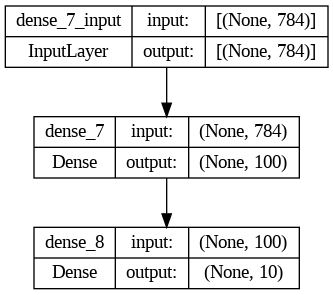

In [117]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='Fashon_MNIST.png')

최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [130]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics='accuracy',
              optimizer='adam')

모델 훈련

In [137]:
hist = model.fit(X_train, y_train, epochs=10,
          validation_data=(X_val,y_val))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2594 - accuracy: 0.9036 - val_loss: 0.3104 - val_accuracy: 0.8920
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2498 - accuracy: 0.9074 - val_loss: 0.3083 - val_accuracy: 0.8888
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2399 - accuracy: 0.9089 - val_loss: 0.3218 - val_accuracy: 0.8882
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2355 - accuracy: 0.9111 - val_loss: 0.3320 - val_accuracy: 0.8845
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2280 - accuracy: 0.9152 - val_loss: 0.3182 - val_accuracy: 0.8912
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2210 - accuracy: 0.9175 - val_loss: 0.3226 - val_accuracy: 0.8888
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2126 - accuracy: 0.9202 - val_loss: 0.3248 - val_accuracy:

손실과 정확도 그래프: 모델 성능 평가

In [138]:
df = pd.DataFrame(hist.history)

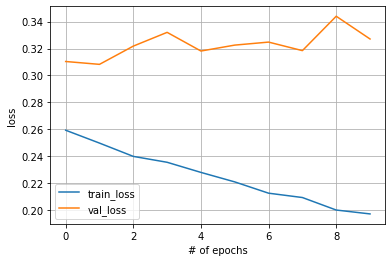

In [139]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.grid();

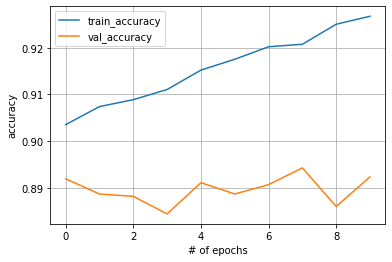

In [140]:
# train_accuracy 시각화
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.xlabel('# of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid();

In [141]:
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)
y_pred_proba[:10]

375/375 [==============================] - 1s 2ms/step


array([[0.00000003, 0.        , 0.00000001, 0.        , 0.00000071,
        0.99877447, 0.00000005, 0.00054795, 0.00000003, 0.00067674],
       [0.00003882, 0.00000451, 0.00240875, 0.00105372, 0.99348223,
        0.        , 0.00297954, 0.        , 0.0000323 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.9999986 , 0.        , 0.00000127, 0.        , 0.00000002],
       [0.00102139, 0.00011193, 0.75546193, 0.00013972, 0.24185975,
        0.        , 0.00140515, 0.        , 0.00000017, 0.        ],
       [0.00000053, 0.9999992 , 0.        , 0.00000007, 0.00000001,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0005069 , 0.0001743 , 0.00005934, 0.00002286, 0.00000274,
        0.9890139 , 0.00010011, 0.00006627, 0.00284653, 0.00720699],
       [0.9854405 , 0.0000001 , 0.00000619, 0.00007857, 0.00000186,
        0.        , 0.01447262, 0.        , 0.        , 0.        ],
       [0.00000039, 0.99999934, 0.0000000

In [142]:
y_pred_class = np.argmax(y_pred_proba, axis=-1)
print(y_pred_class[:10])
print(y_val[:10])

[5 4 5 2 1 5 0 1 2 0]
[5 4 5 2 1 5 0 1 2 0]


In [145]:
submission = pd.read_csv('/content/X_train_F')
submission

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


In [146]:
y_test_proba = model.predict(X_test_np)

313/313 [==============================] - 1s 2ms/step


In [148]:
y_test_proba

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [149]:
np.argmax(y_test_proba, axis=-1)

array([9, 2, 1, ..., 8, 1, 5])

In [150]:
submission['label'] = np.argmax(y_test_proba, axis=-1)

In [151]:
submission

,no,label
0,1,9
1,2,2
2,3,1
3,4,1
4,5,6
...,...,...
9995,9996,9
9996,9997,1
9997,9998,8
9998,9999,1


In [152]:
submission.to_csv('kimminsoo.csv', index=False)

두번째 도전

인공 신경망 모형 구성

In [165]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(784,), activation='relu', \
                kernel_initializer='glorot_uniform')) # 은닉층
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=10,activation='softmax')) # 출력층 

최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [166]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics='accuracy',
              optimizer='adam')

In [167]:
hist = model.fit(X_train, y_train, epochs=15,
          validation_data=(X_val,y_val))

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5293 - accuracy: 0.8119 - val_loss: 0.4079 - val_accuracy: 0.8544
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3888 - accuracy: 0.8580 - val_loss: 0.4386 - val_accuracy: 0.8432
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3500 - accuracy: 0.8711 - val_loss: 0.3477 - val_accuracy: 0.8717
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3259 - accuracy: 0.8798 - val_loss: 0.3391 - val_accuracy: 0.8785
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3101 - accuracy: 0.8858 - val_loss: 0.3467 - val_accuracy: 0.8783
Epoch 6/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2925 - accuracy: 0.8906 - val_loss: 0.3303 - val_accuracy: 0.8849
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2832 - accuracy: 0.8938 - val_loss: 0.3290 - val_accuracy:

손실과 정확도 그래프: 모델 성능 평가

In [168]:
df = pd.DataFrame(hist.history)

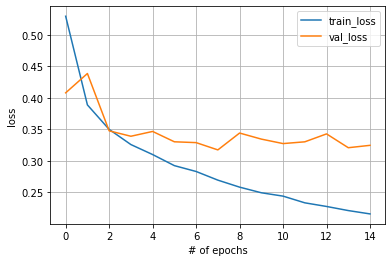

In [169]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.grid();

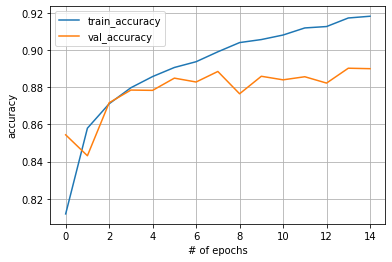

In [170]:
# train_accuracy 시각화
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.xlabel('# of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid();

In [171]:
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)
y_pred_proba[:10]

375/375 [==============================] - 1s 2ms/step


array([[0.00000412, 0.        , 0.        , 0.00000002, 0.00000003,
        0.98440415, 0.00000005, 0.01207401, 0.00000065, 0.00351697],
       [0.00033129, 0.00000721, 0.00131625, 0.08397176, 0.84955883,
        0.00000006, 0.06476569, 0.00002591, 0.00002294, 0.00000006],
       [0.00000003, 0.        , 0.        , 0.        , 0.        ,
        0.9995889 , 0.        , 0.0004023 , 0.00000003, 0.00000874],
       [0.00022676, 0.0000005 , 0.68767095, 0.00018696, 0.31073287,
        0.00000001, 0.00117198, 0.00000002, 0.00000979, 0.00000019],
       [0.00000062, 0.99994   , 0.        , 0.00005925, 0.00000008,
        0.        , 0.00000002, 0.        , 0.        , 0.        ],
       [0.01402161, 0.        , 0.00000016, 0.00000017, 0.00000084,
        0.98564553, 0.00001926, 0.00004527, 0.00000046, 0.00026675],
       [0.9844182 , 0.00000058, 0.0001011 , 0.00008894, 0.00000059,
        0.        , 0.01539043, 0.        , 0.00000006, 0.        ],
       [0.00000014, 0.99999815, 0.       

In [172]:
y_pred_class = np.argmax(y_pred_proba, axis=-1)
print(y_pred_class[:10])
print(y_val[:10])

[5 4 5 2 1 5 0 1 2 6]
[5 4 5 2 1 5 0 1 2 0]


In [173]:
y_test_proba = model.predict(X_test_np)

313/313 [==============================] - 1s 2ms/step


In [174]:
y_test_proba

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [175]:
np.argmax(y_test_proba, axis=-1)

array([9, 2, 1, ..., 8, 1, 5])

In [176]:
submission['label'] = np.argmax(y_test_proba, axis=-1)

In [177]:
submission

,no,label
0,1,9
1,2,2
2,3,1
3,4,1
4,5,6
...,...,...
9995,9996,9
9996,9997,1
9997,9998,8
9998,9999,1


In [178]:
submission.to_csv('kimminsoo2.csv', index=False)